# Pymaceuticals Inc.
---

### Analysis

- The data covered in this study represents the different outcomes of tumor growth under the influence of various experimental anti-cancer drugs. Outcomes are tracked by tumor size, metastatic sites. Independent variables include individual mouse age, gender, and drug administered. Data is longitudinal based on the frequency of sampling in Timepoint. A few outliers were found in tumor size, but were not removed. A positive correlation was identified between mouse weight and tumor size for the drug "Capomulin".
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_count = combined_data["Mouse ID"].nunique()
mouse_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

print(f"Duplicate Mouse IDs: {duplicate_mouse_ids}")


Duplicate Mouse IDs: ['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
print(duplicate_mice)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female 

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'] != 'g989']
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_data["Mouse ID"].nunique()
clean_mouse_count

248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = grouped_data.mean()
median = grouped_data.median()
variance = grouped_data.var()
std_dev = grouped_data.std()
sem = grouped_data.sem()

summary_stats = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": std_dev,
    "SEM": sem
})


print(summary_stats)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_agg = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)


print(summary_stats_agg)

                   Mean     Median   Variance   Std_Dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

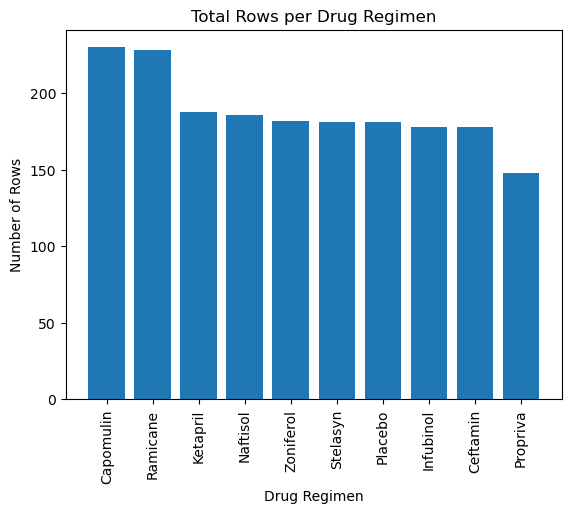

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


row_counts = clean_data["Drug Regimen"].value_counts()

plt.bar(row_counts.index, row_counts.values)

plt.title("Total Rows per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")

plt.xticks(rotation=90)

plt.show()

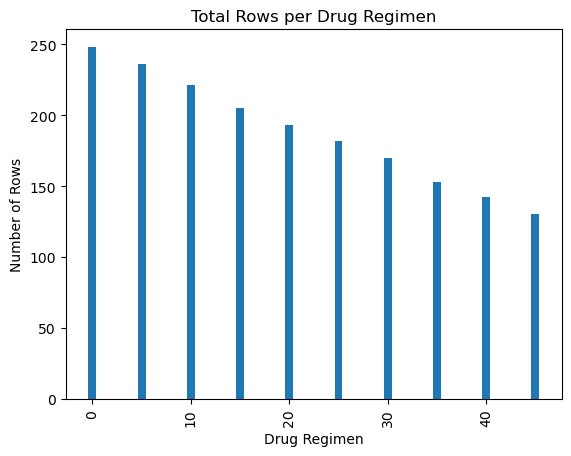

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

row_counts = clean_data["Timepoint"].value_counts()

plt.bar(row_counts.index, row_counts.values)

plt.title("Total Rows per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")

plt.xticks(rotation=90)

plt.show()

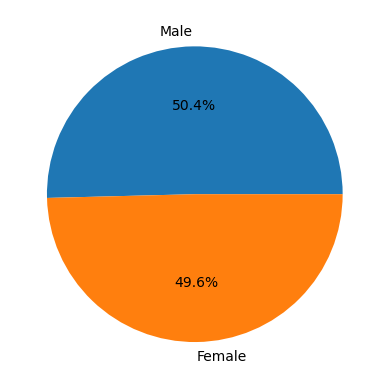

In [26]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_data.drop_duplicates(subset="Mouse ID")[["Mouse ID", "Sex"]]

gender_counts = unique_mice["Sex"].value_counts()

gender_counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    ylabel="",
)
# Make the pie chart
plt.show()

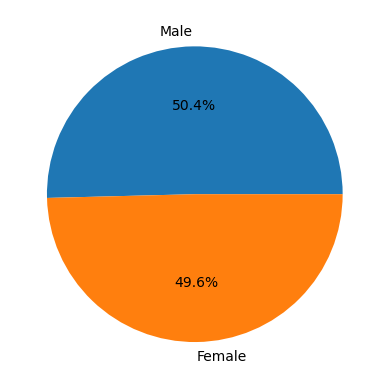

In [28]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_data.drop_duplicates(subset="Mouse ID")[["Mouse ID", "Sex"]]

gender_counts = unique_mice["Sex"].value_counts()

# Make the pie chart
plt.pie(gender_counts.values, labels=gender_counts.index, autopct="%1.1f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = clean_data.merge(last_timepoint, on=["Mouse ID", "Timepoint"])
# Start by getting the last (greatest) timepoint for each mouse
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_filtered = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(selected_regimens)]

print(final_tumor_volume_filtered.head())

   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
7      u153          0           45.000000                 0     Ceftamin   
8      b447          0           45.000000                 0     Ceftamin   
10     x226          0           45.000000                 0     Ceftamin   
11     t573          0           45.000000                 0     Ceftamin   
20     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
7   Female          11          25  
8     Male           2          30  
10    Male          23          28  
11  Female          15          27  
20  Female          18          25  


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume_filtered.loc[
        final_tumor_volume_filtered["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # add subset
    tumor_volumes[treatment] = treatment_data

    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    print(outliers)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/ks/dbrhh9s15y923d2y2mvc1qlm0000gn/T/ipykernel_1136/4080908648.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=treatments)


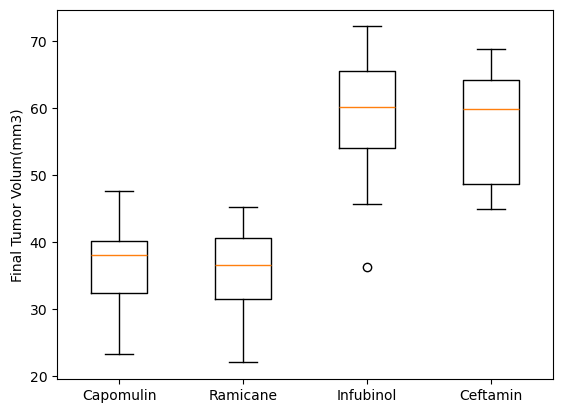

In [33]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
data_to_plot = [tumor_volumes[treatment] for treatment in treatments]

plt.boxplot(data_to_plot, labels=treatments)

plt.ylabel("Final Tumor Volum(mm3)")

plt.show()

## Line and Scatter Plots

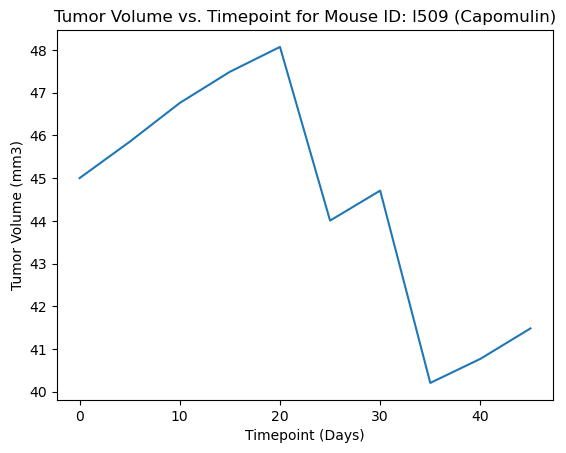

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"

mouse_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == mouse_id)]

plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])

plt.title(f"Tumor Volume vs. Timepoint for Mouse ID: {mouse_id} (Capomulin)")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()



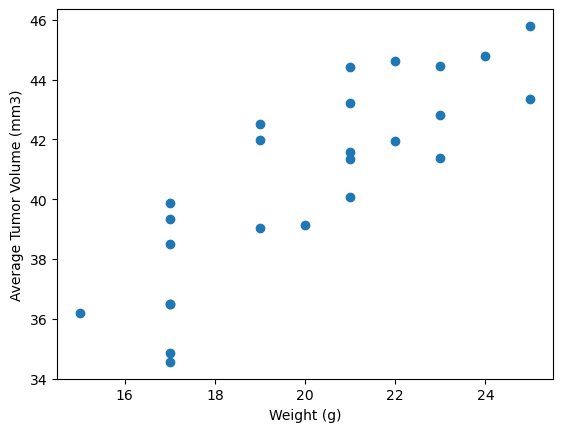

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

plt.scatter(mouse_weights, avg_tumor_volume)

plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

plt.show()

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correl = avg_tumor_volume.corr(mouse_weights)
print(f"The correlation coefficient is {correl}")

regression_line = slope * mouse_weights + intercept



The correlation coefficient is 0.8419363424694721


NameError: name 'slope' is not defined